In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from utils import spherical_dist
from utils import transform_into_bins

In [4]:
df = pd.read_csv('clean_data/master.csv')

df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31780 entries, 0 to 31779
Data columns (total 74 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   numero_departement                                                                        31780 non-null  int64  
 1   nom_commune                                                                               31780 non-null  object 
 2   code_region                                                                               31780 non-null  int64  
 3   nom_region                                                                                31780 non-null  object 
 4   codgeo                                                                                    31780 non-null  int64  
 5   latitude                                             

In [5]:
df['cat_pop'] = pd.cut(df.pop_total, bins = 10)
df.value_counts(df.cat_pop, ascending  = True)

cat_pop
(869311.6, 1086639.5]         0
(1086639.5, 1303967.4]        0
(1303967.4, 1521295.3]        0
(1521295.3, 1738623.2]        0
(1738623.2, 1955951.1]        0
(651983.7, 869311.6]          1
(1955951.1, 2173279.0]        1
(434655.8, 651983.7]          2
(217327.9, 434655.8]          6
(-2173.279, 217327.9]     31770
dtype: int64

## ICI LA CELLULE POUR CHOISIR LA GRANDE VILLE ET LE RAYON AUTOUR 

In [6]:

commune = 'Lyon'
distance = 80
position1 = df[['latitude', 'longitude']].values
position2 = df[df['libelle_commune'] == commune][['latitude', 'longitude']].values[0, :]

distance_to_commune = spherical_dist(position1, position2)
df2 = df.assign(distance_to_commune = distance_to_commune)

df2 = df2[df2['libelle_commune'] != commune]

df_commune = df2[df2['distance_to_commune']<distance]
print(df_commune['nom_region'].unique())
print(df_commune.shape)


['Rhône-Alpes' 'Franche-Comté' 'Auvergne' 'Bourgogne']
(1413, 76)


# Comparaison consommation par secteur entre la Grande commune choisie et la zone choisie.

In [70]:
df_is_commune = df.loc[df['nom_commune']==commune]

In [71]:
df_is_commune['max_conso'] = np.argmax(
    df_is_commune[
        [
            'consommation_libelle_grand_secteur_agriculture',
            'consommation_libelle_grand_secteur_industrie',
            'consommation_libelle_grand_secteur_tertiaire',
#             'consommation_libelle_grand_secteur_résidentiel'
        ]
    ].values, 
    axis=1)

df_is_commune['max_conso'] = df_is_commune['max_conso'].replace({0: 'agriculture', 1: 'industrie', 2: 'tertiaire'})

df_is_commune['max_conso'].value_counts()


<ipython-input-71-e27b329002f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_is_commune['max_conso'] = np.argmax(
<ipython-input-71-e27b329002f5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_is_commune['max_conso'] = df_is_commune['max_conso'].replace({0: 'agriculture', 1: 'industrie', 2: 'tertiaire'})


tertiaire    1
Name: max_conso, dtype: int64

In [98]:
conso_is_commune = df_is_commune[['consommation_libelle_grand_secteur_agriculture', 'consommation_libelle_grand_secteur_industrie',
                            'consommation_libelle_grand_secteur_tertiaire']]
conso_is_commune = conso_is_commune.T
conso_is_commune.reset_index()
conso_is_commune = conso_is_commune.rename({24660 : 'Lyon'}, axis = 1)
conso_is_commune

Lyon
consommation_libelle_grand_secteur_agriculture  2.601251e+02
consommation_libelle_grand_secteur_industrie    1.212947e+06
consommation_libelle_grand_secteur_tertiaire    1.180375e+07

In [120]:
df_commune['max_conso'] = np.argmax(
    df_commune[
        [
            'consommation_libelle_grand_secteur_agriculture',
            'consommation_libelle_grand_secteur_industrie',
            'consommation_libelle_grand_secteur_tertiaire',
#             'consommation_libelle_grand_secteur_résidentiel'
        ]
    ].values, 
    axis=1)

df_commune['max_conso'] = df_commune['max_conso'].replace({0: 'agriculture', 1: 'industrie', 2: 'tertiaire'})

df_commune['max_conso'].value_counts()

conso_commune = df_commune[['consommation_libelle_grand_secteur_agriculture', 'consommation_libelle_grand_secteur_industrie',
                            'consommation_libelle_grand_secteur_tertiaire']]
fonction = {'consommation_libelle_grand_secteur_agriculture' : 'sum', 'consommation_libelle_grand_secteur_industrie' : 'sum',
             'consommation_libelle_grand_secteur_tertiaire' : 'sum'}

conso_commune_sum = pd.DataFrame(conso_commune.agg(fonction), index = ['consommation_libelle_grand_secteur_agriculture',
            'consommation_libelle_grand_secteur_industrie',
            'consommation_libelle_grand_secteur_tertiaire'])
conso_commune_sum = conso_commune_sum.rename({0 : 'Autres communes'}, axis = 1)




<ipython-input-120-b923a6465b63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commune['max_conso'] = np.argmax(
<ipython-input-120-b923a6465b63>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commune['max_conso'] = df_commune['max_conso'].replace({0: 'agriculture', 1: 'industrie', 2: 'tertiaire'})


In [124]:

compare = pd.concat([conso_is_commune, conso_commune_sum], axis = 1)
compare


Lyon  Autres communes
consommation_libelle_grand_secteur_agriculture  2.601251e+02     4.247831e+05
consommation_libelle_grand_secteur_industrie    1.212947e+06     4.388364e+07
consommation_libelle_grand_secteur_tertiaire    1.180375e+07     5.163143e+07

In [138]:
compare['Lyon_vs_autrescommunes'] = compare.apply(lambda x :  (x['Lyon'] - x['Autres communes']) / x['Autres communes'],  axis = 1)

compare


Lyon  Autres communes  \
consommation_libelle_grand_secteur_agriculture  2.601251e+02     4.247831e+05   
consommation_libelle_grand_secteur_industrie    1.212947e+06     4.388364e+07   
consommation_libelle_grand_secteur_tertiaire    1.180375e+07     5.163143e+07   

                                                autres_communes_vs_Lyon  \
consommation_libelle_grand_secteur_agriculture                 0.061237   
consommation_libelle_grand_secteur_industrie                   2.764006   
consommation_libelle_grand_secteur_tertiaire                  22.861553   

                                                Lyon_vs_autrescommunes  
consommation_libelle_grand_secteur_agriculture               -0.999388  
consommation_libelle_grand_secteur_industrie                 -0.972360  
consommation_libelle_grand_secteur_tertiaire                 -0.771384

# Population et Nb d'entreprises dans la zone choisie, hors commune centrale (Lyon) 

In [7]:
df_commune[['pop_total', 'nb_ent']].describe()

pop_total        nb_ent
count    1413.000000   1413.000000
mean     2218.720453    144.304317
std      7179.644247    497.246780
min        28.000000      0.000000
25%       458.000000     20.000000
50%       910.000000     45.000000
75%      1852.000000    110.000000
max    166137.000000  11663.000000

In [ ]:
# Population totale et Nb d'entreprise dans chaque ville en fonction de la distance à la Grande Ville Choisie

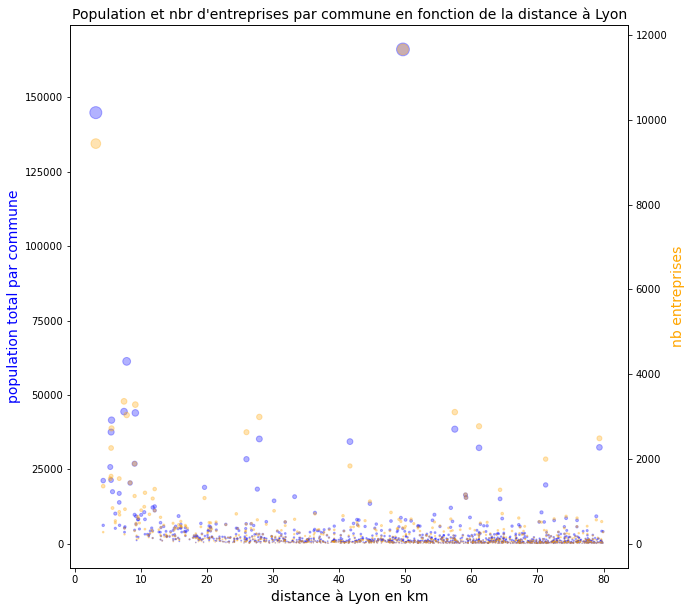

In [8]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df_commune['distance_to_commune'], df_commune['pop_total'], color = 'blue',
           s = df_commune['pop_total']*0.001, alpha = 0.3, label = "population totale")
ax.set_xlabel("distance à {} en km".format(commune), fontsize = 14)
ax.set_ylabel("population total par commune", fontsize = 14, color = 'blue')

ax2 = ax.twinx()
ax2.scatter(df_commune['distance_to_commune'], df_commune['nb_ent'], color = "orange",
          s = df_commune['nb_ent']*0.01, alpha = 0.3, label = "nb d'entreprises" )
ax2.set_ylabel("nb entreprises", color  = "orange", fontsize = 14)
plt.title("Population et nbr d'entreprises par commune en fonction de la distance à {}".format(commune), fontsize = 14)
plt.show()
plt.savefig

In [9]:
df_commune[(df_commune['pop_total']>25000) & (df_commune['distance_to_commune']>20)].sort_values('pop_total', ascending = False)
# Saint-Etienne est une ville de plus de 150 000 habitants et située à moins de 50 km de Lyon. 
# à part Saint-Etienne, on visualise bien que à plus de 15 km de Lyon, il y a moins de communes de = de 25000 habitants
# et de communes avec plus de 2 000 entreprises. 
# avec le nbr de points par catégories, on va pouvoir visualiser à quels secteurs principaux appartiennent ces entreprises

# Grenoble, Chef-lieu de l'Isère est situé à 93 km de Lyon est la ville la plus importante située à plus de 80km de Lyon. 
# Valence, Chambery et Annecy, respactivement chefs-lieux de la Drôme, de la Savoie et Haute-Savoie. 
# => REDUIRE LE RAYON AUTOUR DE LYON A 80 KM 

#on note aussi une quasi supperposition, ou grande proximité entre les communes avec une forte densité d'entreprises
# et une forte densité de population.

# On visualise également des strates en terme de taille de la communes. Avec une très grande majorité de communes 
# de moins de 2500 habitants dès que l'on s'éloigne de 10 km de la Grande Commune. 
# et on observe comme un phénomène où  les villes de moyenne taille se situeraient à 20 km les unes des autres. 

# vérifier quelles sont les communes avec un grd nbr d'habitants à 20 km, 40 km , 60 km....
#regarder si sortie d'autoroute, ter(pop >30000)

numero_departement             nom_commune  code_region   nom_region  \
14197                  42           Saint-Etienne           82  Rhône-Alpes   
38                      1         Bourg-en-Bresse           82  Rhône-Alpes   
24787                  69  Villefranche-sur-Saône           82  Rhône-Alpes   
14188                  42           Saint-Chamond           82  Rhône-Alpes   
8458                   26        Romans-sur-Isère           82  Rhône-Alpes   
25566                  71                   Mâcon           26    Bourgogne   
12970                  38                  Vienne           82  Rhône-Alpes   

       codgeo   latitude  longitude                libgeo_x   nb_ent  \
14197   42218  45.433333   4.400000           Saint-Étienne  11663.0   
38       1053  46.200000   5.216667         Bourg-en-Bresse   3103.0   
24787   69264  45.983333   4.716667  Villefranche-sur-Saône   2989.0   
14188   42207  45.466667   4.500000           Saint-Chamond   1832.0   
8458    26281  45.050000   5.050000        Romans-sur-Isère   2484.0   
25566   71270  46.300000   4.833333                   Mâcon   2769.0   
12970   38544  45.516667   4.866667                  Vienne   2629.0   

       nb_ent_0  ...  nombre_de_points_libelle_grand_secteur_industrie  \
14197    7251.0  ...                                            4209.0   
38       1722.0  ...                                             921.0   
24787    1672.0  ...                                             869.0   
14188    1150.0  ...                                             861.0   
8458     1524.0  ...                                            1038.0   
25566    1545.0  ...                                             705.0   
12970    1671.0  ...                                             526.0   

       consommation_libelle_grand_secteur_industrie  \
14197                                  1.587508e+06   
38                                     6.792147e+05   
24787                                  5.149344e+05   
14188                                  3.595656e+05   
8458                                   8.408388e+05   
25566                                  4.909897e+05   
12970                                  5.289289e+05   

       nombre_de_points_libelle_grand_secteur_secteur inconnu  \
14197                                             6878.0        
38                                                2233.0        
24787                                             1417.0        
14188                                              749.0        
8458                                              1134.0        
25566                                             1853.0        
12970                                              845.0        

       consommation_libelle_grand_secteur_secteur inconnu  \
14197                                      303041.558068    
38                                          62549.968324    
24787                                       26643.749710    
14188                                        5817.947605    
8458                                        18739.447394    
25566                                       33845.887742    
12970                                       20556.045351    

       nombre_de_points_libelle_grand_secteur_tertiaire  \
14197                                           36847.0   
38                                              12791.0   
24787                                            9861.0   
14188                                            5610.0   
8458                                             6906.0   
25566                                            9437.0   
12970                                            7543.0   

       consommation_libelle_grand_secteur_tertiaire  \
14197                                  5.267797e+06   
38                                     1.672908e+06   
24787                                  8.302462e+05   
14188                                  7.187305e+05   
8458 

In [10]:
df_commune[(df_commune['pop_total']>25000) & (df_commune['distance_to_commune']>20)].sort_values(['pop_total', 'distance_to_commune'], 
                                                                                                  ascending  = False)

numero_departement             nom_commune  code_region   nom_region  \
14197                  42           Saint-Etienne           82  Rhône-Alpes   
38                      1         Bourg-en-Bresse           82  Rhône-Alpes   
24787                  69  Villefranche-sur-Saône           82  Rhône-Alpes   
14188                  42           Saint-Chamond           82  Rhône-Alpes   
8458                   26        Romans-sur-Isère           82  Rhône-Alpes   
25566                  71                   Mâcon           26    Bourgogne   
12970                  38                  Vienne           82  Rhône-Alpes   

       codgeo   latitude  longitude                libgeo_x   nb_ent  \
14197   42218  45.433333   4.400000           Saint-Étienne  11663.0   
38       1053  46.200000   5.216667         Bourg-en-Bresse   3103.0   
24787   69264  45.983333   4.716667  Villefranche-sur-Saône   2989.0   
14188   42207  45.466667   4.500000           Saint-Chamond   1832.0   
8458    26281  45.050000   5.050000        Romans-sur-Isère   2484.0   
25566   71270  46.300000   4.833333                   Mâcon   2769.0   
12970   38544  45.516667   4.866667                  Vienne   2629.0   

       nb_ent_0  ...  nombre_de_points_libelle_grand_secteur_industrie  \
14197    7251.0  ...                                            4209.0   
38       1722.0  ...                                             921.0   
24787    1672.0  ...                                             869.0   
14188    1150.0  ...                                             861.0   
8458     1524.0  ...                                            1038.0   
25566    1545.0  ...                                             705.0   
12970    1671.0  ...                                             526.0   

       consommation_libelle_grand_secteur_industrie  \
14197                                  1.587508e+06   
38                                     6.792147e+05   
24787                                  5.149344e+05   
14188                                  3.595656e+05   
8458                                   8.408388e+05   
25566                                  4.909897e+05   
12970                                  5.289289e+05   

       nombre_de_points_libelle_grand_secteur_secteur inconnu  \
14197                                             6878.0        
38                                                2233.0        
24787                                             1417.0        
14188                                              749.0        
8458                                              1134.0        
25566                                             1853.0        
12970                                              845.0        

       consommation_libelle_grand_secteur_secteur inconnu  \
14197                                      303041.558068    
38                                          62549.968324    
24787                                       26643.749710    
14188                                        5817.947605    
8458                                        18739.447394    
25566                                       33845.887742    
12970                                       20556.045351    

       nombre_de_points_libelle_grand_secteur_tertiaire  \
14197                                           36847.0   
38                                              12791.0   
24787                                            9861.0   
14188                                            5610.0   
8458                                             6906.0   
25566                                            9437.0   
12970                                            7543.0   

       consommation_libelle_grand_secteur_tertiaire  \
14197                                  5.267797e+06   
38                                     1.672908e+06   
24787                                  8.302462e+05   
14188                                  7.187305e+05   
8458 

In [11]:
#Pourquoi ces communes en particulier ?  
# Saint-Etienne est est le Chef-lieu du Département de la Loire, et est la Avec 173 089 habitants en 2018,
# elle est la 14e commune la plus peuplée de France (2016)2 et la 2e commune d'Auvergne-Rhône-Alpes. 
# Saint-Étienne Métropole constitue par sa population la 3e métropole régionale après la métropole de Grenoble Alpes 
# et la métropole de Lyon. 
# La commune est aussi au cœur d'une vaste aire urbaine de plus de 520 640 habitants en 2017, 
#la dix-septième de France par sa population, regroupant 117 communes.


# Dans le même département de la Loire, Saint_Chamond est la capitale de la Vallée de Gier, 
# sa situation entre Lyon et Saint-Etienne en fond un pôle économique important. 

# Villefranche-sur-Saône abrite le Port de Commerce de Lyon (situé à 35 km de Lyon) et est la principale ville du Beaujolais


In [12]:
df_commune[df_commune['distance_to_commune']<5]

numero_departement          nom_commune  code_region   nom_region  \
24637                  69         La Mulatière           82  Rhône-Alpes   
24755                  69  Sainte-Foy-lès-Lyon           82  Rhône-Alpes   
24788                  69         Villeurbanne           82  Rhône-Alpes   

       codgeo   latitude  longitude             libgeo_x  nb_ent  nb_ent_0  \
24637   69142  45.733333   4.800000         La Mulatière   270.0     214.0   
24755   69202  45.733333   4.800000  Sainte-Foy-lès-Lyon  1355.0    1011.0   
24788   69266  45.766667   4.883333         Villeurbanne  9440.0    6459.0   

       ...  nombre_de_points_libelle_grand_secteur_industrie  \
24637  ...                                              45.0   
24755  ...                                             141.0   
24788  ...                                            2644.0   

       consommation_libelle_grand_secteur_industrie  \
24637                                  1.367547e+03   
24755                                  4.710253e+04   
24788                                  1.754859e+06   

       nombre_de_points_libelle_grand_secteur_secteur inconnu  \
24637                                              195.0        
24755                                              663.0        
24788                                             5466.0        

       consommation_libelle_grand_secteur_secteur inconnu  \
24637                                        2114.896051    
24755                                        3987.055004    
24788                                       77007.344771    

       nombre_de_points_libelle_grand_secteur_tertiaire  \
24637                                             937.0   
24755                                            3167.0   
24788                                           23297.0   

       consommation_libelle_grand_secteur_tertiaire  \
24637                                  1.708733e+05   
24755                                  2.505918e+05   
24788                                  3.921854e+06   

       nombre_de_points_libelle_grand_secteur_résidentiel  \
24637                                            52741.0    
24755                                           153962.0    
24788                                          1150278.0    

       consommation_libelle_grand_secteur_résidentiel                cat_pop  \
24637                                    3.622220e+05  (-2173.279, 217327.9]   
24755                                    1.482232e+06  (-2173.279, 217327.9]   
24788                                    7.410784e+06  (-2173.279, 217327.9]   

       distance_to_commune  
24637             4.299072  
24755             4.299072  
24788             3.180791  

[3 rows x 76 columns]

In [13]:
df_commune.sort_values(by = 'distance_to_commune', ascending = True).head(5)
# La première commune dans le rayon choisi est à 3 km de la Grande Commune, d'où l'abscence de données 
# dans les graphiques entre 0 et 3 km. 

numero_departement          nom_commune  code_region   nom_region  \
24788                  69         Villeurbanne           82  Rhône-Alpes   
24637                  69         La Mulatière           82  Rhône-Alpes   
24755                  69  Sainte-Foy-lès-Lyon           82  Rhône-Alpes   
24684                  69              Oullins           82  Rhône-Alpes   
24769                  69  Tassin-la-Demi-Lune           82  Rhône-Alpes   

       codgeo   latitude  longitude             libgeo_x  nb_ent  nb_ent_0  \
24788   69266  45.766667   4.883333         Villeurbanne  9440.0    6459.0   
24637   69142  45.733333   4.800000         La Mulatière   270.0     214.0   
24755   69202  45.733333   4.800000  Sainte-Foy-lès-Lyon  1355.0    1011.0   
24684   69149  45.716667   4.800000              Oullins  1532.0    1068.0   
24769   69244  45.766667   4.783333  Tassin-la-Demi-Lune  1591.0    1104.0   

       ...  nombre_de_points_libelle_grand_secteur_industrie  \
24788  ...                                            2644.0   
24637  ...                                              45.0   
24755  ...                                             141.0   
24684  ...                                             290.0   
24769  ...                                             252.0   

       consommation_libelle_grand_secteur_industrie  \
24788                                  1.754859e+06   
24637                                  1.367547e+03   
24755                                  4.710253e+04   
24684                                  2.894876e+04   
24769                                  9.396073e+03   

       nombre_de_points_libelle_grand_secteur_secteur inconnu  \
24788                                             5466.0        
24637                                              195.0        
24755                                              663.0        
24684                                              963.0        
24769                                             1052.0        

       consommation_libelle_grand_secteur_secteur inconnu  \
24788                                       77007.344771    
24637                                        2114.896051    
24755                                        3987.055004    
24684                                       64666.476056    
24769                                       12747.564835    

       nombre_de_points_libelle_grand_secteur_tertiaire  \
24788                                           23297.0   
24637                                             937.0   
24755                                            3167.0   
24684                                            4687.0   
24769                                            3273.0   

       consommation_libelle_grand_secteur_tertiaire  \
24788                                  3.921854e+06   
24637                                  1.708733e+05   
24755                                  2.505918e+05   
24684                                  4.093526e+05   
24769                                  2.298804e+05   

       nombre_de_points_libelle_grand_secteur_résidentiel  \
24788                                          1150278.0    
24637                                            52741.0    
24755                                           153962.0    
24684                                           217475.0    
24769                                           155125.0    

       consommation_libelle_grand_secteur_résidentiel                cat_pop  \
24788                                    7.410784e+06  (-2173.279, 217327.9]   
24637                                    3.622220e+05  (-2173.279, 217327.9]   
24755                                    1.482232e+06  (-2173.279, 217327.9]   
24684                                    1.457992e+06  (-2173.279, 217327.9]   
24769                                    1.311833e+06  (-2173.279, 217327.9]   

       distance_to_commune  
24788             3.180791  
24637          

In [14]:
df_commune['max_conso'] = np.argmax(
    df_commune[
        [
            'consommation_libelle_grand_secteur_agriculture',
            'consommation_libelle_grand_secteur_industrie',
            'consommation_libelle_grand_secteur_tertiaire',
#             'consommation_libelle_grand_secteur_résidentiel'
        ]
    ].values, 
    axis=1)

df_commune['max_conso'] = df_commune['max_conso'].replace({0: 'agriculture', 1: 'industrie', 2: 'tertiaire'})

df_commune['max_conso'].value_counts()


<ipython-input-14-8e281b06c492>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commune['max_conso'] = np.argmax(
<ipython-input-14-8e281b06c492>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commune['max_conso'] = df_commune['max_conso'].replace({0: 'agriculture', 1: 'industrie', 2: 'tertiaire'})


tertiaire      890
industrie      359
agriculture    164
Name: max_conso, dtype: int64

In [15]:
df_commune_3 = df_commune[df_commune['pop_total']<75000]

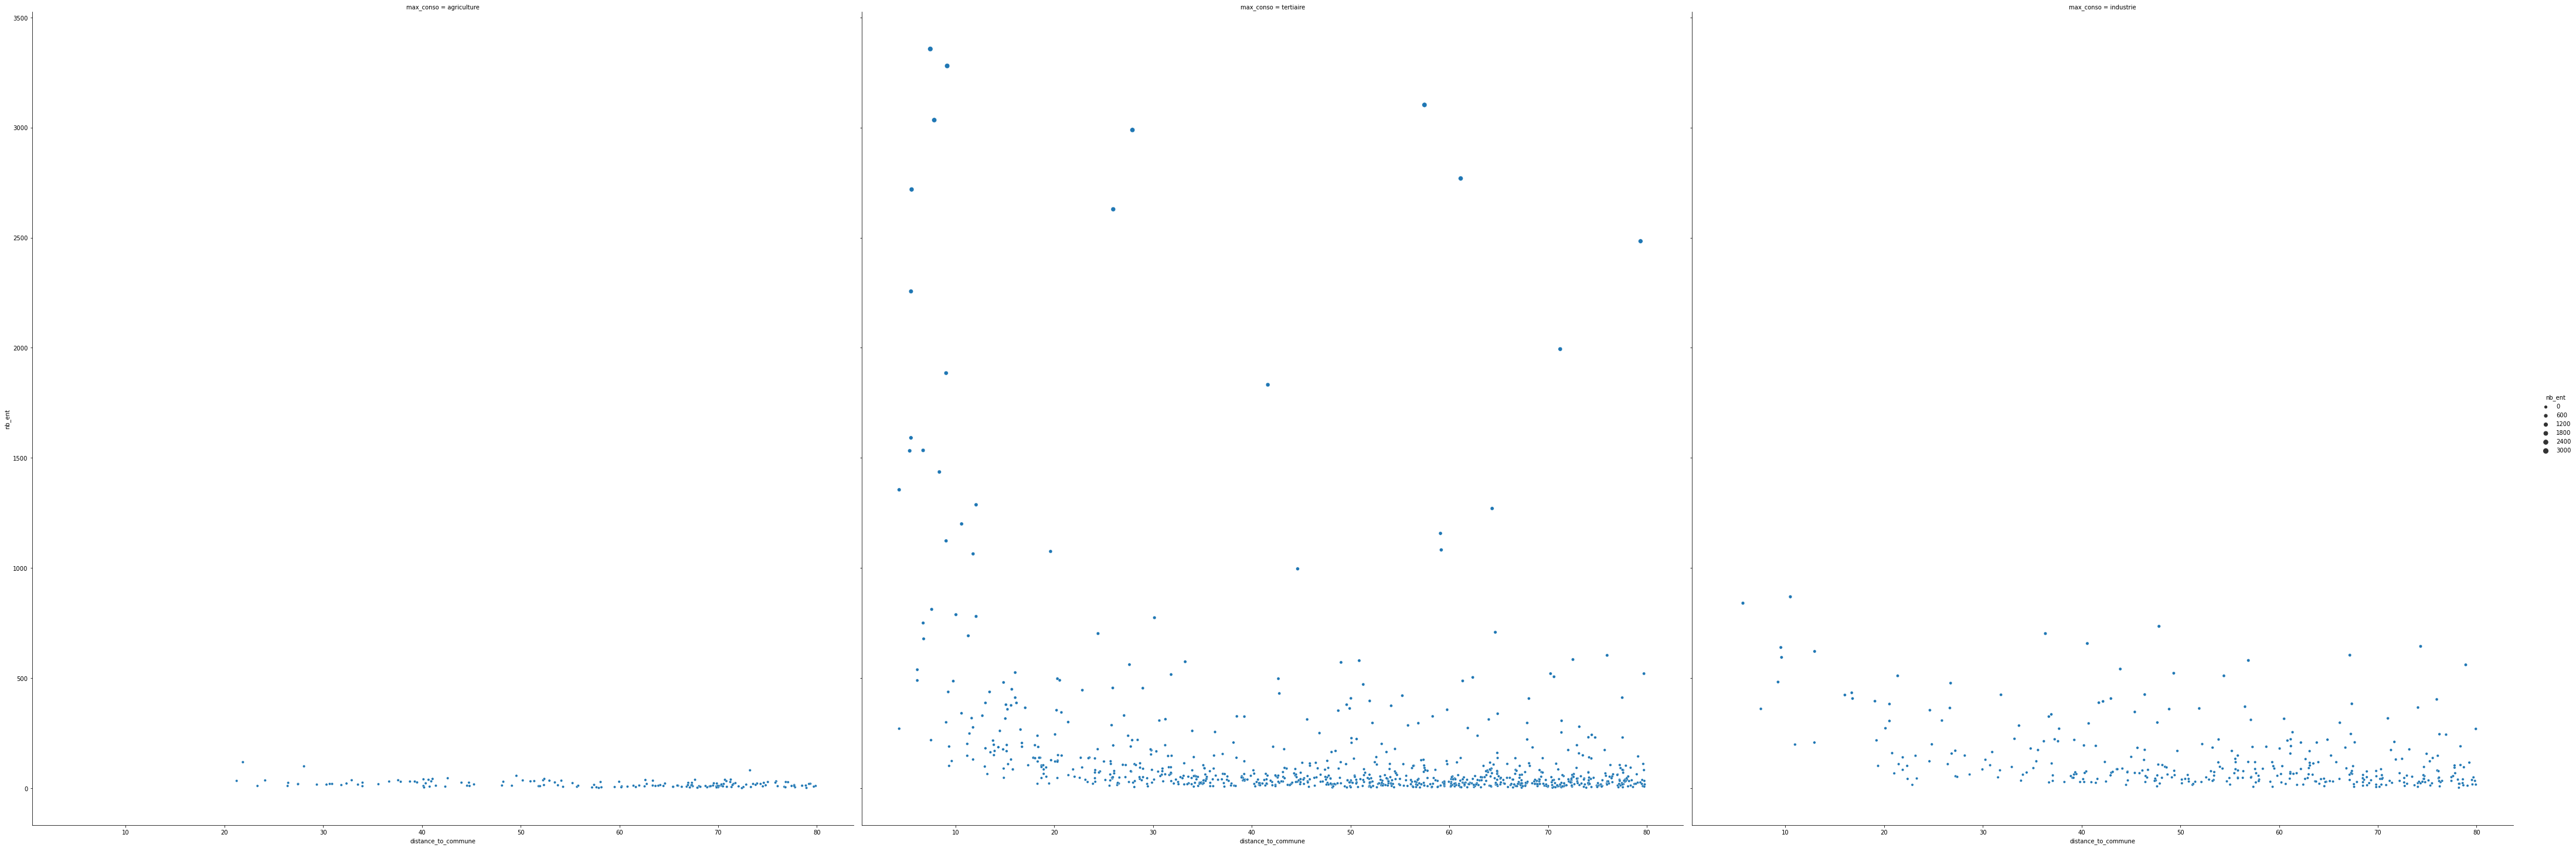

In [16]:
# je n'arrive pas à rendre cette figure plus grande, que faudrait-il faire ? 

sns.relplot(x = 'distance_to_commune', y = 'nb_ent', data = df_commune_3, size = 'nb_ent', col = 'max_conso',
           height = 20)

plt.show()
# enlever St Etienne 
# ou savefig

In [ ]:
# Faire 3 graphique différents ! 

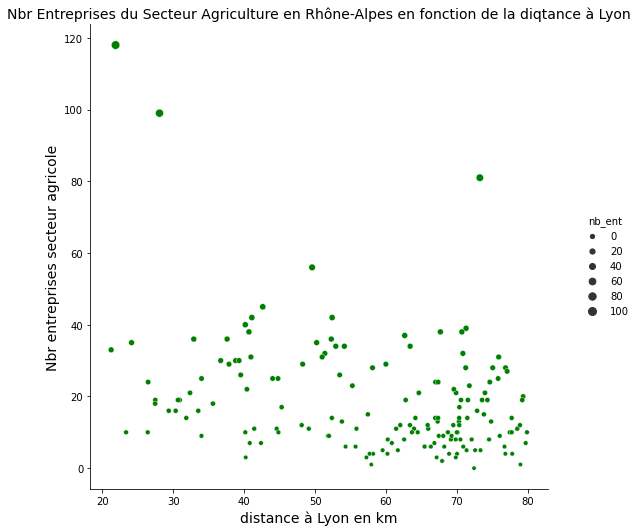

In [19]:
sns.relplot(x = 'distance_to_commune', y = 'nb_ent', data = df_commune_3[df_commune_3['max_conso']=='agriculture'], 
            size = 'nb_ent', color = 'green',
           height = 7)
plt.ylabel('Nbr entreprises secteur agricole', fontsize = 14)
plt.xlabel("distance à {} en km".format(commune), fontsize = 14)
plt.title('Nbr Entreprises du Secteur Agriculture en Rhône-Alpes en fonction de la diqtance à {}'.format(commune), fontsize = 14)
plt.show()

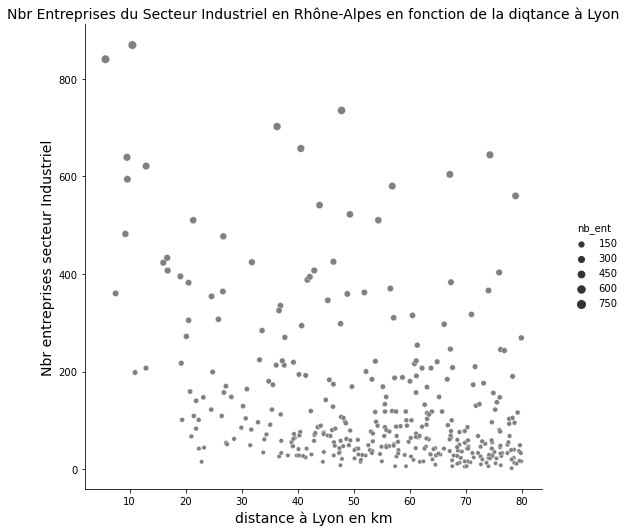

In [21]:
sns.relplot(x = 'distance_to_commune', y = 'nb_ent', data = df_commune_3[df_commune_3['max_conso']=='industrie'], 
            size = 'nb_ent', color = 'grey',
           height = 7)
plt.ylabel('Nbr entreprises secteur Industriel', fontsize = 14)
plt.xlabel("distance à {} en km".format(commune), fontsize = 14)
plt.title('Nbr Entreprises du Secteur Industriel en Rhône-Alpes en fonction de la diqtance à {}'.format(commune), fontsize = 14)
plt.show()

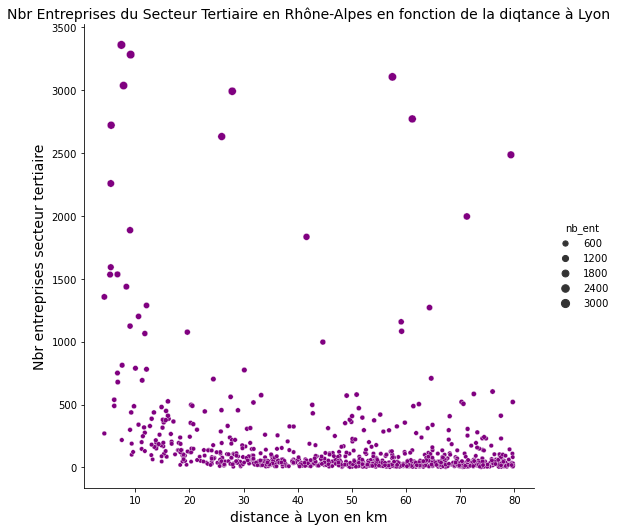

In [22]:
sns.relplot(x = 'distance_to_commune', y = 'nb_ent', data = df_commune_3[df_commune_3['max_conso']=='tertiaire'], 
            size = 'nb_ent', color = 'purple',
           height = 7)
plt.ylabel('Nbr entreprises secteur tertiaire', fontsize = 14)
plt.xlabel("distance à {} en km".format(commune), fontsize = 14)
plt.title('Nbr Entreprises du Secteur Tertiaire en Rhône-Alpes en fonction de la diqtance à {}'.format(commune), fontsize = 14)
plt.show()

In [ ]:
# on visualise bien que les villes ayant une activité principale AGRICOLE (basée sur la conso Elect et gas) 
# sont dans un rayon égale ou supérieur à 20 km de la Grande commune choisie, 
# Tandis que les activités des secteurs INDUSTRIELS et TERTIAIRES sont situés à la toute proximité de la Grande Commune
# même si on note moins de communes avec une activité principlament INDUSTRIELLE à moins de 20 km de la Grande Commune 

In [33]:

df_commune[['distance_to_commune','max_conso']].value_counts()

distance_to_commune  max_conso
9.050332             tertiaire    3
53.851155            tertiaire    2
21.888572            industrie    2
27.748083            tertiaire    2
61.360214            tertiaire    2
                                 ..
63.746040            industrie    1
63.758734            tertiaire    1
63.815098            industrie    1
63.849841            tertiaire    1
3.180791             tertiaire    1
Length: 1336, dtype: int64

In [ ]:
plt.figure(figsize = (7,7))
plt.scatter()

# CARTE AVEC FOLIUM

In [154]:
df.loc[df['nom_commune']=='Lyon'][['latitude', 'longitude']].values


array([[45.75,  4.85]])

In [25]:
pip install folium

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)'))) - skipping



In [26]:
# ESSAI POUR POSITONNER LYON

import folium

c = folium.Map(location = [45.750000, 4.850000])
c.save('maCarte1.html')  #créé un fichier html avec la carte ainsi crée avec Lyon pour centre

# ajouter un marquer sur la carte 
folium.Marker([45.750000, 4.850000], color = 'green', fill = True, fill_color  = 'green').add_to(c)
c



In [ ]:
c.save('maCarte2.html')

In [27]:
df_commune['max_conso'].value_counts()

tertiaire      890
industrie      359
agriculture    164
Name: max_conso, dtype: int64

In [28]:
df_commune_agricole = df_commune.loc[df_commune['max_conso']=='agriculture']
lat = df_commune_agricole['latitude'].to_list()
lon = df_commune_agricole['longitude'].to_list()
communes = df_commune_agricole['nom_commune'].to_list()
nb_ent = df_commune_agricole['nb_ent'].to_list()

my_map_agri = folium.Map(location = [45.750000, 4.850000], tiles='OpenStreetMap', zoom_start = 10)
folium.Marker(location =[45.750000, 4.850000] ).add_to(my_map_agri)


for i in range (len(communes)):
    folium.CircleMarker(location  = (lat[i], lon[i]), radius =nb_ent[i]*0.1, 
                        color = 'green', fill = True, fill_color = 'green' ).add_to(my_map_agri)


my_map_agri



In [45]:
c.save('my_map_agri.html')

In [31]:
df_commune_agricole.sort_values(['nb_ent', 'distance_to_commune'], ascending  = False)

numero_departement          nom_commune  code_region   nom_region  \
24659                  69              Lucenay           82  Rhône-Alpes   
4                       1  Ambérieux-en-Dombes           82  Rhône-Alpes   
131                     1             Foissiat           82  Rhône-Alpes   
8356                   26    Lapeyrouse-Mornay           82  Rhône-Alpes   
12979                  38     Ville-sous-Anjou           82  Rhône-Alpes   
...                   ...                  ...          ...          ...   
12805                  38             Quincieu           82  Rhône-Alpes   
14109                  42               Lavieu           82  Rhône-Alpes   
247                     1             Pouillat           82  Rhône-Alpes   
14                      1                Armix           82  Rhône-Alpes   
14152                  42            Palogneux           82  Rhône-Alpes   

       codgeo   latitude  longitude             libgeo_x  nb_ent  nb_ent_0  \
24659   69122  45.916667   4.700000              Lucenay   118.0      87.0   
4        1005  46.000000   4.900000  Ambérieux-en-Dombes    99.0      73.0   
131      1163  46.366667   5.183333             Foissiat    81.0      58.0   
8356    26155  45.316667   5.000000    Lapeyrouse-Mornay    56.0      42.0   
12979   38556  45.366667   4.850000     Ville-sous-Anjou    45.0      38.0   
...       ...        ...        ...                  ...     ...       ...   
12805   38330  45.266667   5.383333             Quincieu     2.0       2.0   
14109   42117  45.533333   4.033333               Lavieu     2.0       2.0   
247      1309  46.333333   5.433333             Pouillat     1.0       1.0   
14       1019  45.850000   5.583333                Armix     1.0       1.0   
14152   42164  45.750000   3.916667            Palogneux     0.0       0.0   

       ...  consommation_libelle_grand_secteur_industrie  \
24659  ...                                    420.145901   
4      ...                                      0.000000   
131    ...                                    457.169690   
8356   ...                                    326.890507   
12979  ...                                    172.642199   
...    ...                                           ...   
12805  ...                                      0.000000   
14109  ...                                      0.000000   
247    ...                                      0.000000   
14     ...                                      0.000000   
14152  ...                                      0.000000   

       nombre_de_points_libelle_grand_secteur_secteur inconnu  \
24659                                               18.0        
4                                                  144.0        
131                                                 28.0        
8356                                                 7.0        
12979                                               10.0        
...                                                  ...        
12805                                                0.0        
14109                                                0.0        
247                                                  0.0        
14                                                   0.0        
14152                                                0.0        

       consommation_libelle_grand_secteur_secteur inconnu  \
24659                                         202.577114    
4                                            2296.911000    
131                                           274.564448    
8356                                           55.204742    
12979                                          47.291425    
...                                                  ...    
12805                                           0.000000    
14109                                           0.000000    
247                                             0.000000    
14                                           

In [52]:
df_commune_agricole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 26375
Data columns (total 77 columns):
 #   Column                                                                                    Non-Null Count  Dtype   
---  ------                                                                                    --------------  -----   
 0   numero_departement                                                                        164 non-null    int64   
 1   nom_commune                                                                               164 non-null    object  
 2   code_region                                                                               164 non-null    int64   
 3   nom_region                                                                                164 non-null    object  
 4   codgeo                                                                                    164 non-null    int64   
 5   latitude                                        

In [164]:
df_commune_indus = df_commune.loc[df_commune['max_conso']=='industrie']
lat = df_commune_indus['latitude'].to_list()
lon = df_commune_indus['longitude'].to_list()
communes = df_commune_indus['nom_commune'].to_list()
nb_ent = df_commune_indus['nb_ent'].to_list()

my_map_indus = folium.Map(location = [45.750000, 4.850000], tiles='OpenStreetMap', zoom_start = 10)
folium.Marker(location =[45.750000, 4.850000] ).add_to(my_map_indus)


for i in range (len(communes)):
    folium.CircleMarker(location  = (lat[i], lon[i]), radius =nb_ent[i]*0.02, 
                        color = 'grey', fill = True, fill_color = 'grey' ).add_to(my_map_indus)


my_map_indus

In [46]:
c.save('my_map_indus.html')

In [43]:
df_commune_ter = df_commune.loc[df_commune['max_conso']=='tertiaire']
lat = df_commune_ter['latitude'].to_list()
lon = df_commune_ter['longitude'].to_list()
communes = df_commune_ter['nom_commune'].to_list()
nb_ent = df_commune_ter['nb_ent'].to_list()

my_map_ter = folium.Map(location = [45.750000, 4.850000], tiles='OpenStreetMap', zoom_start = 10)
folium.Marker(location =[45.750000, 4.850000] ).add_to(my_map_ter)


for i in range (len(communes)):
    folium.CircleMarker(location  = (lat[i], lon[i]), radius =nb_ent[i]*0.002, 
                        color = 'purple', fill = True, fill_color = 'purple' ).add_to(my_map_ter)


my_map_ter

In [47]:
c.save('my_map_ter.html')

In [39]:

lat = df_commune['latitude'].to_list()
lon = df_commune['longitude'].to_list()
communes = df_commune['nom_commune'].to_list()
total_pop = df_commune['pop_total'].to_list()
nb_ent = df_commune['nb_ent'].to_list()

my_map_pop = folium.Map(location = [45.750000, 4.850000], tiles='OpenStreetMap', zoom_start = 10)
folium.Marker(location =[45.750000, 4.850000] ).add_to(my_map_pop)


for i in range (len(communes)):
    folium.CircleMarker(location  = (lat[i], lon[i]), radius =total_pop[i]*0.0002, 
                        color = 'blue', fill = True, fill_color = 'blue' ).add_to(my_map_pop)


my_map_pop


In [126]:
c.save('my_map_pop.html')

In [138]:

lat = df_commune['latitude'].to_list()
lon = df_commune['longitude'].to_list()
communes = df_commune['nom_commune'].to_list()
total_pop = df_commune['pop_total'].to_list()
nb_ent = df_commune['nb_ent'].to_list()

my_map_ent = folium.Map(location = [45.750000, 4.850000], tiles='OpenStreetMap', zoom_start = 10)
folium.Marker(location =[45.750000, 4.850000] ).add_to(my_map_ent)


for i in range (len(communes)):
    folium.CircleMarker(location  = (lat[i], lon[i]), radius =nb_ent[i]*0.003, 
                        color = 'black', fill = True, fill_color = 'black' ).add_to(my_map_ent)


my_map_ent

In [48]:
c.save('my_map_ent.html')

## tentative superposition Population et Entreprises - Pas du tout lisible ! 

In [38]:

lat = df_commune['latitude'].to_list()
lon = df_commune['longitude'].to_list()
communes = df_commune['nom_commune'].to_list()
total_pop = df_commune['pop_total'].to_list()
nb_ent = df_commune['nb_ent'].to_list()

my_map_pe = folium.Map(location = [45.750000, 4.850000], tiles='OpenStreetMap', zoom_start = 10)
folium.Marker(location =[45.750000, 4.850000] ).add_to(my_map_pe)


for i in range (len(communes)):
    folium.CircleMarker(location  = (lat[i], lon[i]), radius =nb_ent[i]*0.004, 
                        color = 'black', fill = True, fill_color = 'black' ).add_to(my_map_pe)
    folium.CircleMarker(location  = (lat[i], lon[i]), radius =total_pop[i]*0.0003, 
                        color = 'blue', fill = True, fill_color = 'blue' ).add_to(my_map_pe)


my_map_pe

## Tentative de supperposition communes avec une activité principale Industrielle avec celles dont l'activté principale
## est Agricole - ça marche ! 

In [41]:
df_commune_indus = df_commune.loc[df_commune['max_conso']=='industrie']
lat_indus = df_commune_indus['latitude'].to_list()
lon_indus = df_commune_indus['longitude'].to_list()
communes_indus = df_commune_indus['nom_commune'].to_list()
nb_ent_indus = df_commune_indus['nb_ent'].to_list()

df_commune_agricole = df_commune.loc[df_commune['max_conso']=='agriculture']
lat_agri = df_commune_agricole['latitude'].to_list()
lon_agri = df_commune_agricole['longitude'].to_list()
communes_agri = df_commune_agricole['nom_commune'].to_list()
nb_ent_agri = df_commune_agricole['nb_ent'].to_list()


my_map_IndAgri = folium.Map(location = [45.750000, 4.850000], tiles='OpenStreetMap', zoom_start = 10)
folium.Marker(location =[45.750000, 4.850000] ).add_to(my_map_IndAgri)


for i in range (len(communes_indus)):
    folium.CircleMarker(location  = (lat_indus[i], lon_indus[i]), radius =nb_ent_indus[i]*0.02, 
                        color = 'grey', fill = True, fill_color = 'grey' ).add_to(my_map_IndAgri)

for i in range (len(communes_agri)):
   
    folium.CircleMarker(location  = (lat_agri[i], lon_agri[i]), radius =nb_ent_agri[i]*0.1, 
                        color = 'green', fill = True, fill_color = 'green' ).add_to(my_map_IndAgri)
my_map_IndAgri


In [49]:
c.save('my_map_indusAgri.html')

# Secteur d'activité principlae de la zone étudiée

In [62]:
fonct = {'pop_total' : 'sum', 'nb_ent': 'sum', 'nb_ent_0' : 'sum', 'nb_ent_1-5' : 'sum' ,
        'nb_ent_6-10': 'sum', 'nb_ent_11-20' : 'sum', 'nb_ent_21-50' : 'sum','nb_ent_51-99': 'sum',
        'nb_ent_100-199' : 'sum', 'nb_ent_200-499' : 'sum', 'nb_ent_500+' : 'sum',
        }




df_commune_sum = df_commune.groupby('max_conso').agg(fonct).reset_index()
df_commune_sum.sort_values('nb_ent', ascending = False)

max_conso  pop_total    nb_ent  nb_ent_0  nb_ent_1-5  nb_ent_6-10  \
2    tertiaire  2309646.0  153564.0   98773.0     36441.0       7072.0   
1    industrie   755855.0   47322.0   29931.0     11491.0       2203.0   
0  agriculture    69551.0    3016.0    2358.0       551.0         52.0   

   nb_ent_11-20  nb_ent_21-50  nb_ent_51-99  nb_ent_100-199  nb_ent_200-499  \
2        5748.0        3563.0        1196.0           501.0           229.0   
1        1713.0        1268.0         420.0           188.0            95.0   
0          41.0          12.0           1.0             1.0             0.0   

   nb_ent_500+  
2         41.0  
1         13.0  
0          0.0

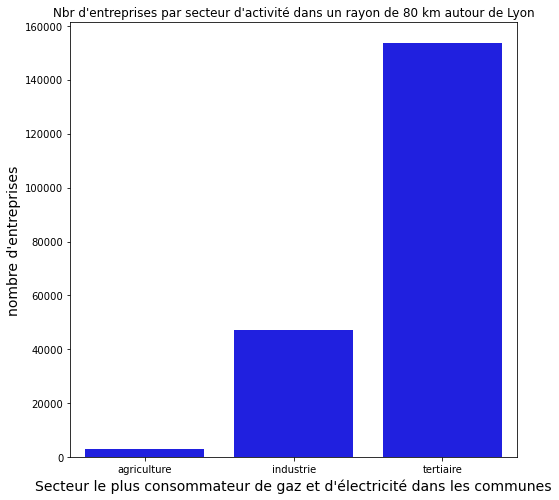

In [63]:




plt.figure(figsize = (8,8))
sns.barplot(x = 'max_conso', y ='nb_ent', color = 'blue', data = df_commune_sum)
plt.title("Nbr d'entreprises par secteur d'activité dans un rayon de 80 km autour de Lyon") 
plt.xlabel("Secteur le plus consommateur de gaz et d'électricité dans les communes", fontsize = 14)
plt.ylabel("nombre d'entreprises", fontsize = 14)
plt.show()

In [51]:
df_commune_ter = df_commune.loc[df_commune['max_conso']=='tertiaire']
lat = df_commune_ter['latitude'].to_list()
lon = df_commune_ter['longitude'].to_list()
communes = df_commune_ter['nom_commune'].to_list()
nb_ent = df_commune_ter['nb_ent'].to_list()

my_map_ter = folium.Map(location = [45.750000, 4.850000], tiles='OpenStreetMap', zoom_start = 10)
folium.Marker(location =[45.750000, 4.850000] ).add_to(my_map_ter)


for i in range (len(communes)):
    folium.CircleMarker(location  = (lat[i], lon[i]), radius =nb_ent[i]*0.003, 
                        color = 'purple', fill = True, fill_color = 'purple' ).add_to(my_map_ter)


my_map_ter

In [50]:
c.save('my_map_ter.html')

In [172]:
df_commune.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 26375
Data columns (total 77 columns):
 #   Column                                                                                    Non-Null Count  Dtype   
---  ------                                                                                    --------------  -----   
 0   numero_departement                                                                        1413 non-null   int64   
 1   nom_commune                                                                               1413 non-null   object  
 2   code_region                                                                               1413 non-null   int64   
 3   nom_region                                                                                1413 non-null   object  
 4   codgeo                                                                                    1413 non-null   int64   
 5   latitude                                       

# Différence entre communes de moins de 2000 habitants à = 20 20 km de Lyon et plus de 2000 habitants (à proximité)
# mode de cohabitation - inégalité ? concentration de foyer sans enfants ? Monoparentales ? 
# répartition par âge ? Idem différences ? Pus de 60 ans et plus dans communes de moins de 2000 hab. et à 20km de Lyon ? 

## Communes de moins de 2000 habitants à plus de 20km de Lyon - Mode Cohab.

In [148]:
print(df_commune.shape)
df_commune_less2K = df_commune.loc[(df_commune['pop_total']<2000) & (df_commune['distance_to_commune']> 20)]
df_commune_less2K.shape

(1413, 77)


(1072, 77)

In [149]:
df_commune_less2K.groupby('max_conso').agg(fonct).reset_index()

max_conso  pop_total   nb_ent  nb_ent_0  nb_ent_1-5  nb_ent_6-10  \
0  agriculture    69551.0   3016.0    2358.0       551.0         52.0   
1    industrie   236569.0  13309.0    8841.0      2969.0        528.0   
2    tertiaire   510600.0  27074.0   19431.0      5655.0        863.0   

   nb_ent_11-20  nb_ent_21-50  nb_ent_51-99  nb_ent_100-199  nb_ent_200-499  \
0          41.0          12.0           1.0             1.0             0.0   
1         458.0         313.0         115.0            62.0            21.0   
2         659.0         353.0          82.0            20.0            11.0   

   nb_ent_500+  
0          0.0  
1          2.0  
2          0.0

In [ ]:
 pop_mode_cohabitation_enfant_dun_couple                                                   164 non-null    float64 
 40  pop_mode_cohabitation_enfant_dune_famille_monoparentale                                   164 non-null    float64 
 41  pop_mode_cohabitation_adulte_dun_couple_sans_enfant                                       164 non-null    float64 
 42  pop_mode_cohabitation_adulte_dun_couple_avec_enfant(s)                                    164 non-null    float64 
 43  pop_mode_cohabitation_adulte_dune_famille_monoparentale                                   164 non-null    float64 
 44  pop_mode_cohabitation_personne_vivant_hors_famille_dans_un_menage_de_plusieurs_personnes  164 non-null    float64 
 45  pop_mode_cohabitation_personne_vivant_seule

In [169]:
fonction2 = {'pop_total' : 'sum',
            'pop_mode_cohabitation_enfant_dune_famille_monoparentale' : 'sum',                              
            'pop_mode_cohabitation_adulte_dun_couple_sans_enfant' : 'sum',                          
            'pop_mode_cohabitation_adulte_dun_couple_avec_enfant(s)' : 'sum',                        
            'pop_mode_cohabitation_adulte_dune_famille_monoparentale' : 'sum',                                   
            'pop_mode_cohabitation_personne_vivant_hors_famille_dans_un_menage_de_plusieurs_personnes' : 'sum',  
            'pop_mode_cohabitation_personne_vivant_seule' : 'sum'}

cohab_less2K = pd.DataFrame(df_commune_less2K.agg(fonction2))
cohab_less2K = cohab_less2K.rename({0 : 'total sum'}, axis = 1)
cohab_less2K = cohab_less2K.sort_values('total sum', ascending = False)
cohab_less2K['%_cohab'] = cohab_less2K.apply(lambda x : x['total sum'] / cohab_less2K['total sum'][0], axis = 1)
cohab_less2K

total sum   %_cohab
pop_total                                            816720.0  1.000000
pop_mode_cohabitation_adulte_dun_couple_avec_en...   235419.0  0.288249
pop_mode_cohabitation_adulte_dun_couple_sans_en...   209971.0  0.257091
pop_mode_cohabitation_personne_vivant_seule           79053.0  0.096793
pop_mode_cohabitation_enfant_dune_famille_monop...    33091.0  0.040517
pop_mode_cohabitation_adulte_dune_famille_monop...    21458.0  0.026273
pop_mode_cohabitation_personne_vivant_hors_fami...    17697.0  0.021668

##  Communes avec plus de 2000 habitants qlq soit la distance avec Lyon - Mode cohab.

In [151]:
df_commune_more2K = df_commune.loc[df_commune['pop_total']>2000]
df_commune_more2K.shape

(318, 77)

In [171]:
cohab_more2K = pd.DataFrame(df_commune_more2K.agg(fonction2))
cohab_more2K = cohab_more2K.rename({0 : 'total sum'}, axis = 1)
cohab_more2K = cohab_more2K.sort_values('total sum', ascending = False)
cohab_more2K['%_cohab'] = cohab_more2K.apply(lambda x : x['total sum'] / cohab_more2K['total sum'][0], axis = 1)
cohab_more2K


total sum   %_cohab
pop_total                                           2286516.0  1.000000
pop_mode_cohabitation_adulte_dun_couple_avec_en...   563249.0  0.246335
pop_mode_cohabitation_adulte_dun_couple_sans_en...   516068.0  0.225701
pop_mode_cohabitation_personne_vivant_seule          347771.0  0.152096
pop_mode_cohabitation_enfant_dune_famille_monop...   150171.0  0.065677
pop_mode_cohabitation_adulte_dune_famille_monop...    93336.0  0.040820
pop_mode_cohabitation_personne_vivant_hors_fami...    69966.0  0.030599

In [ ]:
# http://geoconfluences.ens-lyon.fr/glossaire/rurale-commune

In [ ]:
# idée à explorer : en ajoutant Lyon, et en prenant le milieu de chaque tranche de salariés par entreprises
# et en ne considérant que les personnes en âge de travailler (20 à65 ans) 
# regarder sur Lyon et proche périphérie (10 km max) le rapport entre le nbr de postes dans les ent. et la population en âge de 
# travailler (voir appliquer t% de chômage sur le secteur). 
# Considérer la part du tertiaire
# Y a t-il une pop en âge de Wer suffisante pour occuper les postes sur Lyon et proximté  ? 
# idem sur zone à plus de 10km de Lyon ? 
#voir ce que ça donne  - peut expliquer mouvement de popolation ? et cas du tertiaire propice au télétravail ? 